In [101]:
# Importation des packaques et du dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

!pip install category_encoders
import category_encoders as ce
ohe = ce.OneHotEncoder()
oe = ce.OrdinalEncoder()

# Importation du fichier de scraping
df = pd.read_csv('vgsales.csv',index_col=False)

# Retrait des variables inutiles
df.drop(['Rank','Name','gamename','serie','NA_Sales','EU_Sales','JP_Sales','Other_Sales','metaNoteQ','samename'],axis=1,inplace=True)


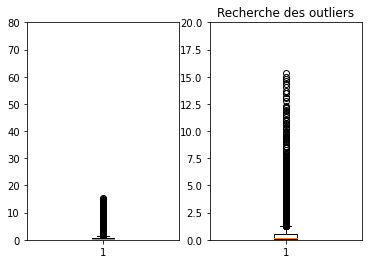

In [116]:
# Recherche des outliers
#plt.scatter(df.index,df['Global_Sales']);

plt.subplot(1,2,1)
plt.boxplot(df['Global_Sales']);
plt.ylim([0,80]);

plt.subplot(1,2,2)
plt.boxplot(df['Global_Sales']);
plt.ylim([0,20]);

plt.title("Recherche des outliers")

# Retrait des outliers
#df = df[df['Global_Sales']<20]

# Recherche des données manquantes
df.isnull().sum()

# Remplacement des années manquantes par 0 (autres)
df[['Year','metaNote','metaNbVote','userNote','userNbVote']] = df[['Year','metaNote','metaNbVote','userNote','userNbVote']].fillna(0)

# Remplacement des Publishers manquants par unknown
df['Publisher'] = df['Publisher'].fillna('unknown')

# Traitement des données catégorielles
df2 = ohe.fit_transform(df)

In [54]:
df2.head(20)


Platform_1  Platform_2  Platform_3  Platform_4  Platform_5  Platform_6  \
31           1           0           0           0           0           0   
32           0           1           0           0           0           0   
33           0           0           1           0           0           0   
34           0           0           0           1           0           0   
35           0           0           0           0           1           0   
36           0           0           0           0           0           1   
37           0           0           0           0           0           0   
38           0           0           0           0           0           0   
39           0           0           1           0           0           0   
40           0           0           0           1           0           0   
41           0           0           0           0           0           0   
42           1           0           0           0           0           0   
43           1           0           0           0           0           0   
44           1           0           0           0           0           0   
45           0           1           0           0           0           0   
46           0           0           0           0           0           0   
47           0           0           0           1           0           0   
48           0           0           0           1           0           0   
49           0           0           0           0           0           1   
50           0           0           1           0           0           0   

    Platform_7  Platform_8  Platform_9  Platform_10  ...  Publisher_418  \
31           0           0           0            0  ...              0   
32           0           0           0            0  ...              0   
33           0           0           0            0  ...              0   
34           0           0           0            0  ...              0   
35           0           0           0            0  ...              0   
36           0           0           0            0  ...              0   
37           1           0           0            0  ...              0   
38           0           1           0            0  ...              0   
39           0           0           0            0  ...              0   
40           0           0           0            0  ...              0   
41           0           0           1            0  ...              0   
42           0           0           0            0  ...              0   
43           0           0           0            0  ...              0   
44           0           0           0            0  ...              0   
45           0           0           0            0  ...              0   
46           0           1           0            0  ...              0   
47           0           0           0            0  ...              0   
48           0           0           0            0  ...              0   
49           0           0           0            0  ...              0   
50           0           0           0            0  ...              0   

    Publisher_419  Publisher_420  Publisher_421  Global_Sales  metaNote  \
31              0              0              0         12.73      76.0   
32              0              0              0         12.27      86.0   
33              0              0              0         12.21      85.0   
34              0              0              0         12.14      94.0   
35              0              0              0         11.98      97.0   
36              0              0              0         11.89      94.0   
37              0              0              0         11.66      89.0   
38              0              0              0         11.52      97.0   
39              0              0              0         11.33      83.0   
40              0              0       

In [117]:
# preprocessing

scaler = preprocessing.StandardScaler().fit_transform(df2)

# définition de la target et data
target = np.log(df2['Global_Sales'])
data = df2.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [118]:
# Test du modèle de Régression Linéaire

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Train score :", lr.score(X_train_scaled,y_train))
print("Test score :",lr.score(X_test_scaled,y_test))

y_pred = lr.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : -173.56217472753778
Test score : -121.51326294719773
MAE :  0.8459938620120517


In [65]:
# Test du modèle Ridge
RD_model = Ridge()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'solver': ['auto', 'cholesky', 'lsqr', 'sparse_cg', 'lbfgs']}

RD = GridSearchCV(RD_model, tuned_parameters, cv = 10)
RD.fit(X_train, y_train)

print("Train score :", RD.score(X_train_scaled,y_train))
print("Test score :",RD.score(X_test_scaled,y_test))

y_pred = RD.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", RD.best_params_)
print ("Best Score", RD.best_score_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'sa

Train score : -29.608708752425155
Test score : -30.589861125703276
MAE :  0.8079063763151986
Best Params {'alpha': 3.2, 'fit_intercept': True, 'normalize': False, 'solver': 'auto'}
Best Score 0.4191771055164793


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.41239995 0.41239995 0.13132876 ... 0.0728205  0.09583483        nan]
  warnings.warn(


In [119]:
ridge = Ridge(alpha=3.2,fit_intercept=True,normalize=False,solver='auto')
ridge.fit(X_train, y_train)

print("Train score :", ridge.score(X_train_scaled,y_train))
print("Test score :",ridge.score(X_test_scaled,y_test))

y_pred = ridge.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : -30.568379573525636
Test score : -26.688039171676053
MAE :  0.8409524447370912


In [71]:
# Test du modèle Lasso

from sklearn.linear_model import Lasso
LS_model = Lasso()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'selection': ['cyclic', 'random']}

from sklearn.model_selection import GridSearchCV
LS = GridSearchCV(LS_model, tuned_parameters, cv = 10)
LS.fit(X_train, y_train)

print("Train score :", LS.score(X_train_scaled,y_train))
print("Test score :",LS.score(X_test_scaled,y_test))

y_pred = LS.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", LS.best_params_)
print ("Best Score", LS.best_score_)

Train score : -0.30931760166581945
Test score : -0.31265950281027655
MAE :  1.0248905656371368
Best Params {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'selection': 'cyclic'}
Best Score 0.1575941690791109


In [120]:
lasso = Lasso(alpha=0.1,fit_intercept=True,normalize=False,selection='cyclic')
lasso.fit(X_train_scaled,y_train)
print("Train score :", lasso.score(X_train_scaled,y_train))
print("Test score :",lasso.score(X_test_scaled,y_test))

y_pred = lasso.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.2692694423230292
Test score : 0.2695632901129741
MAE :  10.583893844353979


In [78]:
# Test du modèle ElasticNet

EN_model = ElasticNet()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'selection': ['cyclic', 'random']}

EN = GridSearchCV(EN_model, tuned_parameters, cv = 10)
EN.fit(X_train, y_train)

print("Train score :", EN.score(X_train_scaled,y_train))
print("Test score :",EN.score(X_test_scaled,y_test))

y_pred = EN.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", EN.best_params_)
print ("Best Score", EN.best_score_)

Train score : -0.32225625504780697
Test score : -0.3331891864751624
MAE :  1.0089124645297836
Best Params {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'selection': 'random'}
Best Score 0.20392800594210997


In [122]:
enet = ElasticNet(alpha=0.1,fit_intercept=True,normalize=False,selection='random')
enet.fit(X_train_scaled,y_train)
print("Train score :", enet.score(X_train_scaled,y_train))
print("Test score :",enet.score(X_test_scaled,y_test))

y_pred = enet.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.3547823852458857
Test score : 0.348855861436393
MAE :  22.667425720281607


In [92]:
df3=df
df3[["Genre","Publisher", "Platform"]] = oe.fit_transform(df[["Genre","Publisher","Platform"]])
target = (df3['Global_Sales']*100).astype('int')
data = df3.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Scale
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
# Test modèle KNN

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(X_train_scaled,y_train)
print("Train score :", knn.score(X_train_scaled,y_train))
print("Test score :",knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.3083523406104051
Test score : 0.03735881841876629
MAE :  136.4522154648132


In [96]:
# Test du modèle xgboost

parameters = { 'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate' : (0.05,0,1,0.25,0.50,1),
              'criterion' : ['friedman_mse','squared_error', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

#model = grid.fit(X_train,y_train)
#print(model.best_params_,'\n')
#print(model.best_estimator_,'\n')

#grid = GridSearchCV(GradientBoostingRegressor(),parameters)
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

print("Train score :", gbr.score(X_train_scaled, y_train))
print("Test score :",gbr.score(X_test_scaled, y_test))

y_pred = gbr.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : -0.0024021442204722465
Test score : -0.011866488534933994
MAE :  42.28259148889554


In [78]:
# Test modèle Regression Logistic

lr = LogisticRegression(C=1.0)
lr.fit(X_train_scaled,y_train)
print("Train score :", lr.score(X_train_scaled,y_train))
print("Test score :",lr.score(X_test_scaled,y_test))

y_pred = lr.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.049093081351145866
Test score : 0.05386620330147698
MAE :  64.6159860990443


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# test modèle random forest

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))
print("Test score :",dt_clf.score(X_test_scaled,y_test))

y_pred = dt_clf.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.6396220267188009
Test score : 0.036490008688097306
MAE :  256.4926151172893


In [80]:
# test modèle random forest
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))
print("Test score :",dt_clf.score(X_test_scaled,y_test))

y_pred = RF_clf.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.6396220267188009
Test score : 0.036490008688097306
MAE :  186.6724587315378


In [57]:
# Test du modèle de regression logistic

params = {
    'penalty':['l1', 'l2', 'elasticnet'],        # l1 is Lasso, l2 is Ridge
    'solver':['liblinear'],
    'C': np.linspace(0.00002,1,100)
}

lr = LogisticRegression()
lr_gs = GridSearchCV(lr, params, cv=3, verbose=1).fit(X_train, y_train)

print ("Best Params", lr_gs.best_params_)
print ("Best Score", lr_gs.best_score_)

#clf = LinearRegression()
#clf.fit(X_train_scaled,y_train)
#print("Train score :", clf.score(X_train_scaled,y_train))
#print("Test score :",clf.score(X_test_scaled,y_test))

#y_pred = clf.predict(X_test)
#print("MAE : ",mean_absolute_error(y_test, y_pred))

Fitting 3 folds for each of 300 candidates, totalling 900 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

KeyboardInterrupt: 